# a) !pip install studentID_learn            (Ensure your repository is successfully installed. Otherwise, something has gone wrong) 

In [24]:
!pip install --index-url https://test.pypi.org/simple/ --no-deps s1280130_learn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://test.pypi.org/simple/
  Obtaining dependency information for s1280130_learn from https://test-files.pythonhosted.org/packages/fa/ee/f92c9fa88fa44e39c5d20b74d8824fbe2311dc3232eba9c94a4f8f8e74ff/s1280130_learn-2023.7.30-py3-none-any.whl.metadata


#  b) !pip show studentID_learn            (This command will print the contents of your repository)

In [25]:
!pip show s1280130_learn 

Name: s1280130-learn
Version: 2023.7.30
Summary: This software is being developed at the University of Aizu, Aizu-Wakamatsu, Fukushima, Japan
Home-page: https://github.com/suzuki-zudai/s1280130_learn/
Author: Suzuki Shota
Author-email: zudaiaka@gmail.com
License: GPLv3
Location: /home/suzuki/.local/lib/python3.10/site-packages
Requires: matplotlib, numpy, pandas, plotly
Required-by: 


#  c) Import your package and pass the transactional database created in the previous exercise to your frequenciesOfItems.py program.

In [26]:
import s1280130_learn.statistics.frequenciesOfItems as a
inputFile="PM24HeavyPollutionRecordingSensors.csv"
sep="\t"
x=a.frequenciesOfItems(inputFile,sep)
data=x.countFre()

# d) Pass the itemsFrequenciesDictionary generated in the previous step to heatMapItemsFrequencies.py and plot them.

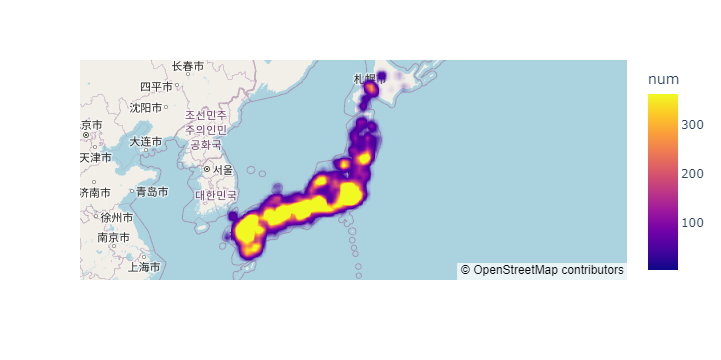

In [27]:
import s1280130_learn.visualization.heatMapItemsFrequencies as h
inputDB=data
x=h.heatMapItemsFrequencies(inputDB)
x.getCountDataset()
x.showFigure()

#  e)  Continue from the knowledge discovery step of Exercise-13. That is,  (You can copy-paste the code. No problem)

##  i)  Implement the FP-growth algorithm by reading the manual: https://udaylab.github.io/PAMI/manuals/utilization.html 

In [28]:
#import the frequent pattern mining algorithm
from PAMI.frequentPattern.basic import FPGrowth as alg

#inputFile = 'fileName'
inputFile = "PM24HeavyPollutionRecordingSensors.csv"

#specify the constraints used in the model
minSup=200

#create the object of the mining algorithm 
obj = alg.FPGrowth(inputFile, minSup)

#start the mining process
obj.startMine()

#Print the number of interesting patterns generated
print("Total number of Frequent Patterns:", len(obj.getPatterns()))

#Save the generated patterns in a file
obj.save('outputFile.tsv')

# Determine the memory consumed by the mining algorithm
print("Total Memory in RSS", obj.getMemoryRSS())

# Determine the total runtime consumed by the mining algorithm
print("Total ExecutionTime in seconds:", obj.getRuntime())

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 529
Total Memory in RSS 235429888
Total ExecutionTime in seconds: 0.7210988998413086


## ii) Store the patterns in a file, say frequentPatterns.txt

In [29]:
obj.save("frequentPatterns.txt")

##  iii) Write a Python code that reads the frequentPatterns.txt file, identifies the longest pattern, and shows it on a plotly express open street map.

In [30]:
import sys
import pandas as pd
import plotly.express as px
import numpy as np


"""
this is the code to read file, find the longest pattern and show it in map.

how to use: python3 Ex132.py <inputfile>
        inputfile:str
            input file name

"""

class showLongestPatternLocation():
    """
    """
    
    
    def readFile(sef,inputFile):
        """
        to read the file and save longest pattren
        
        input:
            inputFile:str
                input file name
        """
        max=0
        with open(inputFile,"r") as f:
            for line in f:
                line.strip()
                temp = [i.rstrip() for i in line.split(":")]
                temp = [i.rstrip() for i in temp[0].split("\t")]
                temp = [x for x in temp if x ]
                if len(temp)>max:
                    maxPattern=temp
                    max=len(temp)
        return maxPattern
    
    def covertLocationToDF(self,maxPattern):
        """
                make dataset has location and how many time it is in dataset
                input:
                    maxpattern:list
                        longest pattern 
        """
        fd=pd.DataFrame(columns=['Lat', 'Lon'])
        for loc in maxPattern:
            loc=loc.replace("POINT(",'')
            loc=loc.replace(")",'')
            loc=loc.split(' ')
            lat=loc[0]
            lon=loc[1]
            fd.loc[fd.shape[0]] =[lon,lat]
        return fd
    def showPoints(self,fd):
        """
        To make a graph by Plotly
        input:
            fd:pandas dataframe
                To store the location (lat and lon)
        """
        ##set scatter_mapbox to make a graph
        fig = px.scatter_mapbox(fd,
        
        lat="Lat",
        lon="Lon",
        center =dict(lon=-139.89,lat=37.51),
        zoom=3, height=600
        )

        #custom the graph
        fig.update_layout(mapbox_style='open-street-map',
        mapbox_zoom=4,
        mapbox_center_lon=139.89,
        mapbox_center_lat=37.51,
        margin={"r":0,"t":0,"l":0,"b":0}
        )
        n = len(fd)
        scatter = fig.data[0]
        colors = ['blue'] * n
        scatter.marker.color = colors
        scatter.marker.size = [20] * n
        fig.show()
"""
if __name__ == '__main__':
    _ap=str()
    if len(sys.argv)==2:
            inputFile=sys.argv[1]
            x=showLongestPatternLocation()
            pattren=x.readFile(inputFile)
            DF=x.covertLocationToDF(pattern)
            x.showPoints(DF)
    else:
        print("Error! The number of input parameters do not match the total number of parameters provided")
"""

'\nif __name__ == \'__main__\':\n    _ap=str()\n    if len(sys.argv)==2:\n            inputFile=sys.argv[1]\n            x=showLongestPatternLocation()\n            pattren=x.readFile(inputFile)\n            DF=x.covertLocationToDF(pattern)\n            x.showPoints(DF)\n    else:\n        print("Error! The number of input parameters do not match the total number of parameters provided")\n'

          Lat          Lon
0  33.5738695  130.3165995
1  33.2769087  129.9041873
2  33.6051041  130.4105582
3  33.5854231  130.2527462


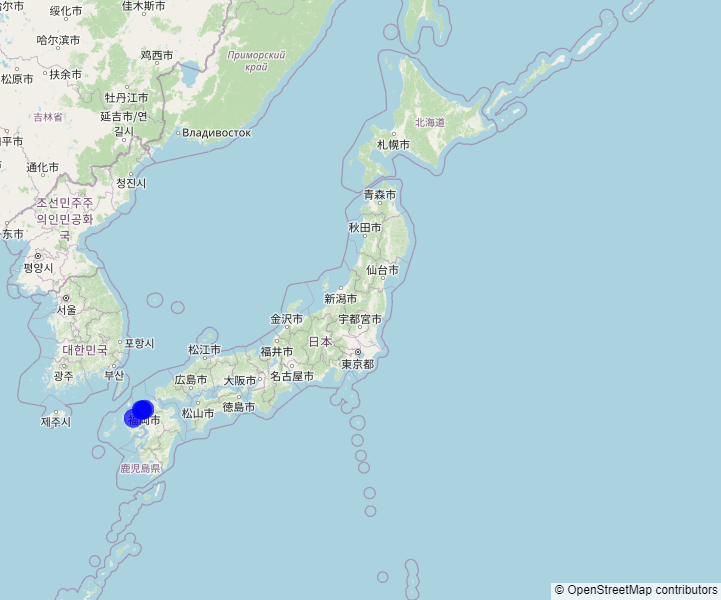

In [31]:
inputFile="frequentPatterns.txt"
x=showLongestPatternLocation()
pattern=x.readFile(inputFile)
DF=x.covertLocationToDF(pattern)
print(DF)
x.showPoints(DF)

![lomgest point](Ex14.png)

## [githubs link](https://github.com/suzuki-zudai/s1280130_learn/tree/main)

In [ ]:
https://github.com/suzuki-zudai/s1280130_learn/tree/main